In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import re
from mlxtend.frequent_patterns import apriori, fpgrowth,association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import MeanShift
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data = pd.read_csv('/content/heart_attack_prediction_dataset.csv')
data2 = data.copy()
data2.describe().T


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
Previous Heart Problems,8763.0,0.495835,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data2.describe().T

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
Previous Heart Problems,8763.0,0.495835,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
columns_to_remove = ['Patient ID','Country','Continent','Diet']
binary_columns = []

for column in data2.columns:
    unique_values = data2[column].unique()
    if len(unique_values) == 2:
        binary_columns.append(column)

df1 = data2.drop(columns=binary_columns)
df1 = data2.drop(columns=columns_to_remove)
mode_values = df1.mode().T[0]
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
def is_outlier(value, lower, upper):
    return (value < lower) or (value > upper)
outliers = (df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))
outliers_count = outliers.sum()
mode_outliers_df = pd.DataFrame({'mode': mode_values, 'outliers': outliers_count})
result_df = pd.concat([df1.describe().T, mode_outliers_df], axis=1)

result_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-173-30eef420e2fd>:12: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df1.quantile(0.25)
<ipython-input-173-30eef420e2fd>:13: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df1.quantile(0.75)
<ipython-input-173-30eef420e2fd>:17: FutureWarning: Automatic reindexing on D

,count,mean,std,min,25%,50%,75%,max,mode,outliers
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000,90.0,0
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000,235.0,0
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000,94.0,0
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000,1.0,0
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0
Smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,904
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000,1.0,0
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000,1.0,0
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709,0.002442,0
Previous Heart Problems,8763.0,0.495835,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


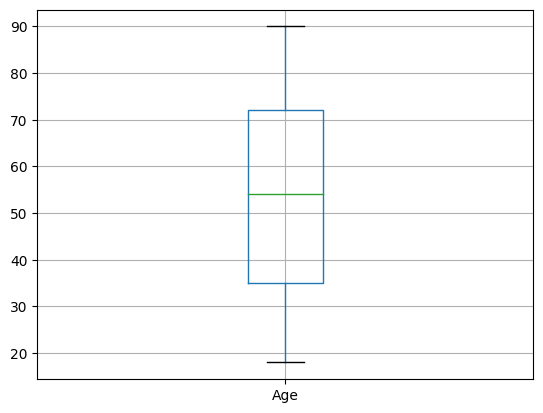

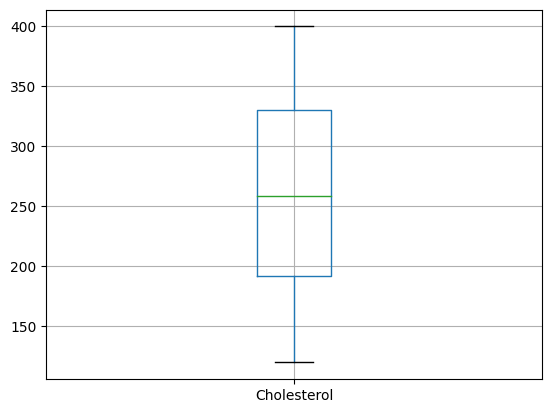

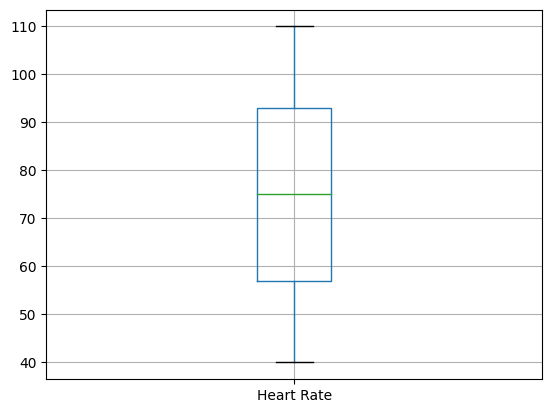

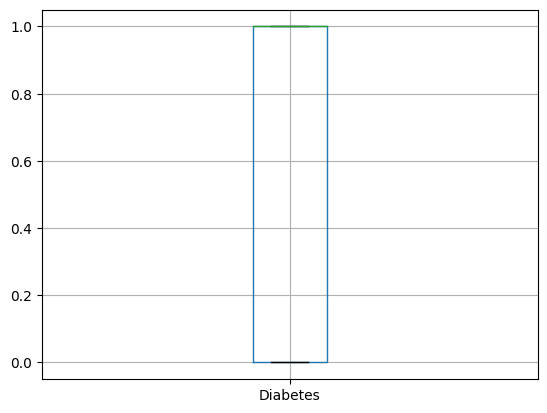

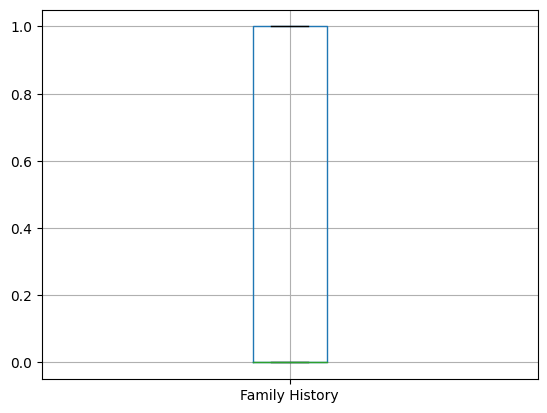

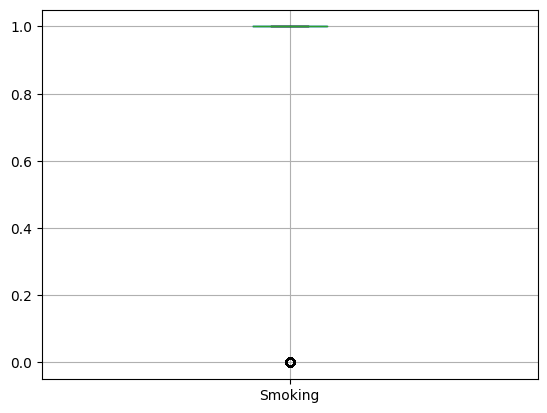

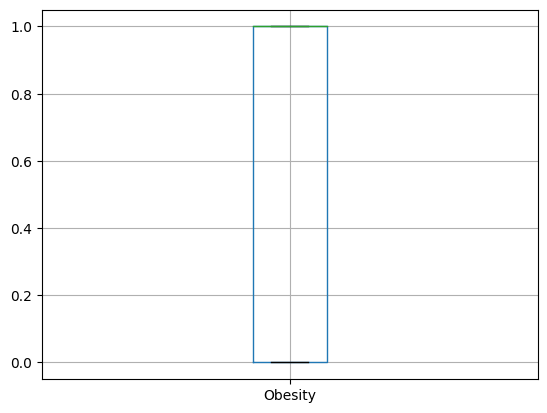

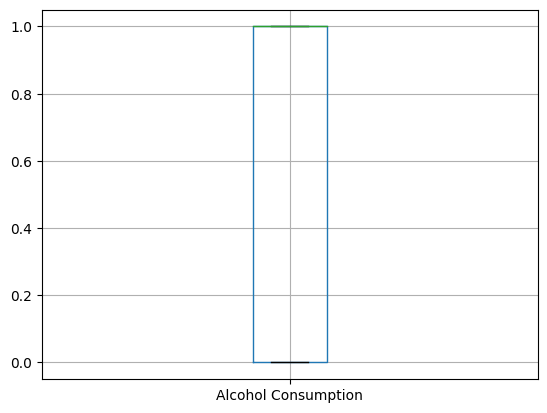

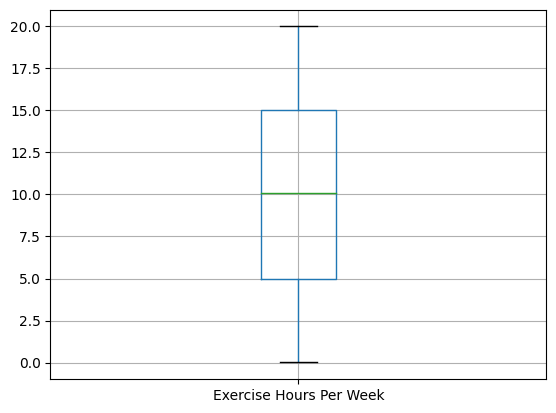

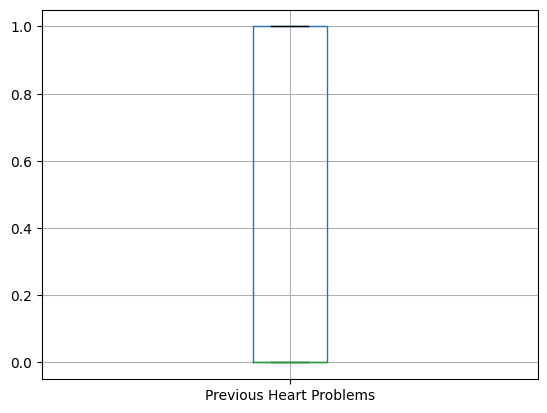

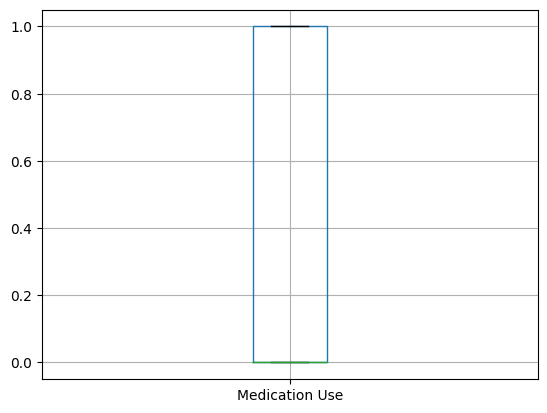

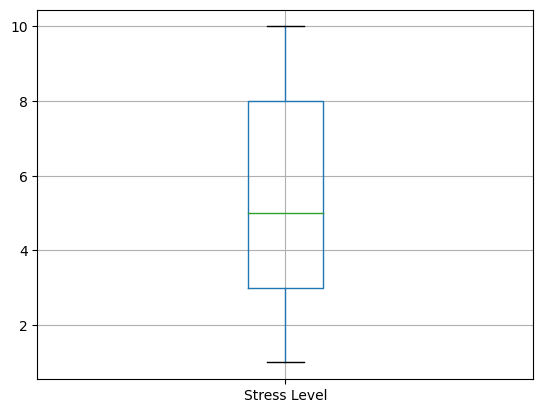

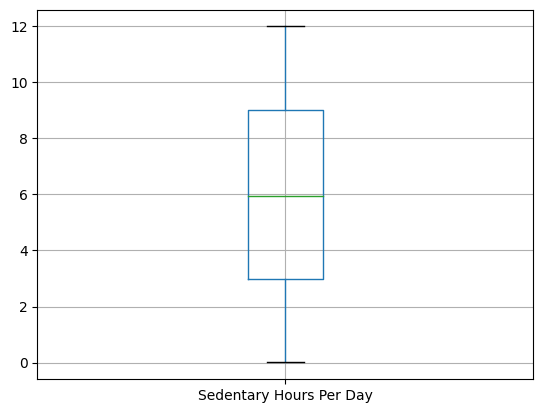

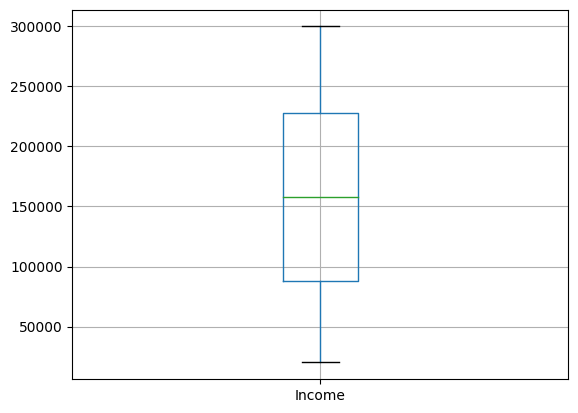

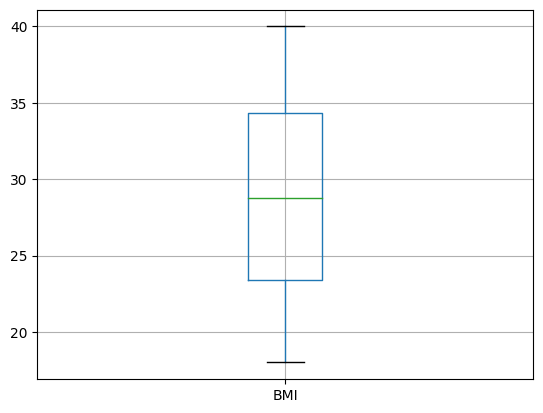

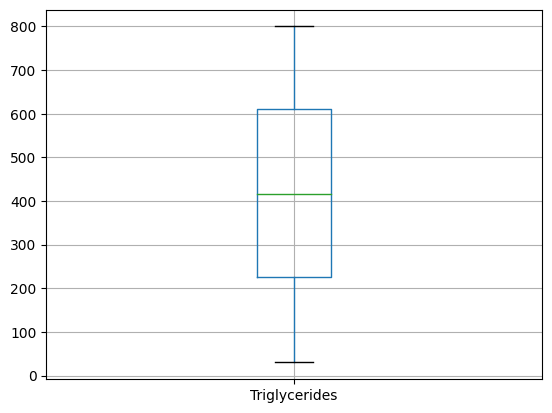

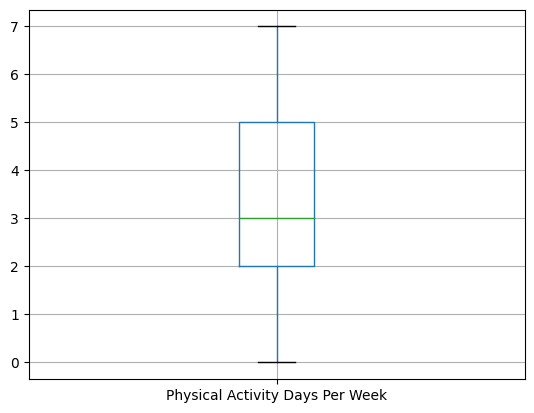

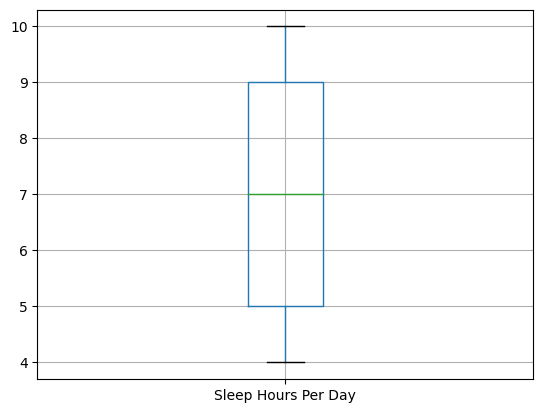

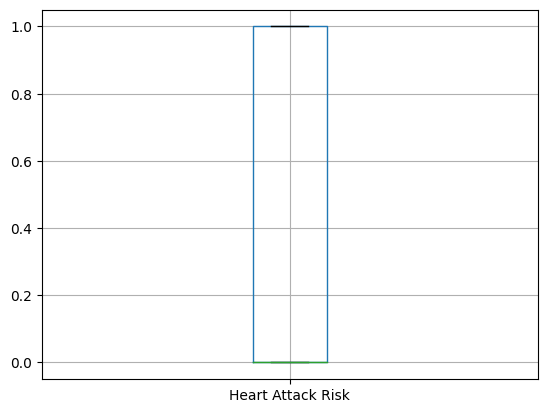

In [ ]:
for x in data2:
    if data2[x].dtype != 'O':
        box = data2.boxplot(column=[x])
        plt.show(box)


In [ ]:
#BMI
bins = [0, 18, 24.9, 29.9, float('inf')]
bin_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
data2['BMI'] = pd.cut(data2['BMI'], bins=bins, labels=bin_labels, right=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# AGE
bins = [0,20, 40, 60, 80, 100]
bin_labels= ['20','40', '60', '80', '100']

data2['Age'] = pd.cut(data2['Age'], bins=bins, labels=bin_labels, right=False, include_lowest=True)




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bins = [0, 200, 260, float('inf')]
bin_labels = ['Normal', 'High', 'Very High']
data2['Cholesterol'] = pd.cut(data2['Cholesterol'], bins=bins, labels=bin_labels, right=False, include_lowest=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bins = [0,5,10,float('inf')]
bin_labels= ['low','medium','high']
data2['Exercise Hours Per Week'] = pd.cut(data2['Exercise Hours Per Week'], bins=bins, labels=bin_labels, right=False, include_lowest=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bloodp = data2['Blood Pressure']
split_blood_pressure = bloodp.str.split('/', expand=True)
systolic_values = pd.to_numeric(split_blood_pressure[0])
diastolic_values = pd.to_numeric(split_blood_pressure[1])
def replace(row):
      systolic = row[0]
      diastolic = row[1]
      if(systolic>=120) and  (diastolic>=80):
        return 'low'
      else:
        return 'high'

data2['Blood Pressure'] = pd.concat([systolic_values, diastolic_values], axis=1).apply(replace, axis=1)
data2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,80,Male,High,low,72,0,0,1,0,...,6.615001,261404,Obese,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,40,Male,Very High,low,98,1,1,1,1,...,4.963459,285768,Overweight,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,40,Female,Very High,low,72,1,0,0,0,...,9.463426,235282,Overweight,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,100,Male,Very High,low,73,1,1,1,0,...,7.648981,125640,Obese,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,80,Male,Very High,high,93,1,1,1,1,...,1.514821,160555,Normal,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,80,Male,Normal,high,61,1,1,1,0,...,10.806373,235420,Normal,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,40,Female,Normal,low,73,1,0,0,1,...,3.833038,217881,Normal,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,60,Male,High,high,105,0,1,1,1,...,2.375214,36998,Obese,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,40,Male,Normal,high,60,1,0,1,0,...,0.029104,209943,Overweight,114,2,8,Brazil,South America,Southern Hemisphere,0


In [ ]:
bins=[0,150,300,float('inf')]
labels=['high','boarderline high','high']
data2['Triglycerides'] = pd.cut(data2['Triglycerides'], bins=bins, labels=bin_labels, right=False, include_lowest=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Stress Level
bins=[0,4,7,float('inf')]
labels=['low stress','medium stress','high stress']
data2['Stress Level'] = pd.cut(data2['Stress Level'], bins=bins, labels=bin_labels, right=False, include_lowest=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
 # Heart Rate
bins = [0, 60, 80, 100, float('inf')]  # Define the boundaries of the bins
labels = ['low', 'normal', 'elevated', 'high']  # Define labels for each bin
data2['Heart Rate'] = pd.cut(data2['Heart Rate'], bins=bins, labels=labels, right=False, include_lowest=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sex_har = ['Sex', 'Heart Attack Risk']
smoking_har=['Smoking', 'Heart Attack Risk']
al_har=['Alcohol Consumption','Heart Attack Risk']
obe_har=['Obesity','Heart Attack Risk']
family_har=['Family History','Heart Attack Risk']
bmi_har=['BMI','Heart Attack Risk']
tri_har=['Triglycerides','Heart Attack Risk']
stress_har=['Stress Level','Heart Attack Risk']
age_har=['Age','Heart Attack Risk']
ch_har=['Cholesterol','Heart Attack Risk']
ex_har=['Exercise Hours Per Week','Heart Attack Risk']
diet_har=['Diet','Heart Attack Risk']
blood_har=['Blood Pressure','Heart Attack Risk']
heart_har=['Heart Rate','Heart Attack Risk']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
encod1 = pd.get_dummies(data2[sex_har])
encod1

encod2=pd.get_dummies(data2[smoking_har])
encod2

encod3=pd.get_dummies(data2[al_har])
encod3

encod4=pd.get_dummies(data2[obe_har])
encod4

encod5=pd.get_dummies(data2[family_har])
encod5

encod6=pd.get_dummies(data2[age_har])
encod6

encod7=pd.get_dummies(data2[ch_har])
encod7

encod8=pd.get_dummies(data2[ex_har])
encod8

encod9=pd.get_dummies(data2[diet_har])
encod9

encod10=pd.get_dummies(data2[blood_har])
encod10

encod11=pd.get_dummies(data2[bmi_har])
encod11

encod12=pd.get_dummies(data2[tri_har])
encod12

encod13=pd.get_dummies(data2[stress_har])
encod13


encod14=pd.get_dummies(data2[heart_har])
encod14

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Heart Attack Risk,Heart Rate_low,Heart Rate_normal,Heart Rate_elevated,Heart Rate_high
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
8758,0,0,1,0,0
8759,0,0,1,0,0
8760,1,0,0,0,1
8761,0,0,1,0,0


In [ ]:
apriori(encod1, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.358211,(Heart Attack Risk)
1,0.302636,(Sex_Female)
2,0.697364,(Sex_Male)
3,0.107726,"(Sex_Female, Heart Attack Risk)"
4,0.250485,"(Sex_Male, Heart Attack Risk)"


In [ ]:
apriori(encod2, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.896839,(Smoking)
1,0.358211,(Heart Attack Risk)
2,0.320666,"(Smoking, Heart Attack Risk)"


In [ ]:
apriori(encod3, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.598083,(Alcohol Consumption)
1,0.358211,(Heart Attack Risk)
2,0.211001,"(Alcohol Consumption, Heart Attack Risk)"


In [ ]:
apriori(encod4, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.501426,(Obesity)
1,0.358211,(Heart Attack Risk)
2,0.176424,"(Obesity, Heart Attack Risk)"


In [ ]:
apriori(encod5, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.492982,(Family History)
1,0.358211,(Heart Attack Risk)
2,0.176195,"(Family History, Heart Attack Risk)"


In [ ]:
apriori(encod6, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.358211,(Heart Attack Risk)
1,0.282552,(Age_40)
2,0.268972,(Age_60)
3,0.266689,(Age_80)
4,0.153144,(Age_100)
5,0.102134,"(Age_40, Heart Attack Risk)"


In [ ]:
apriori(encod7, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.358211,(Heart Attack Risk)
1,0.279813,(Cholesterol_Normal)
2,0.222983,(Cholesterol_High)
3,0.497204,(Cholesterol_Very High)
4,0.181216,"(Cholesterol_Very High, Heart Attack Risk)"


In [ ]:
apriori(encod8, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.358211,(Heart Attack Risk)
1,0.250599,(Exercise Hours Per Week_low)
2,0.245806,(Exercise Hours Per Week_medium)
3,0.503595,(Exercise Hours Per Week_high)
4,0.184640,"(Exercise Hours Per Week_high, Heart Attack Risk)"


In [ ]:
apriori(encod9, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.358211,(Heart Attack Risk)
1,0.332306,(Diet_Average)
2,0.337784,(Diet_Healthy)
3,0.329910,(Diet_Unhealthy)
4,0.117083,"(Diet_Average, Heart Attack Risk)"
5,0.123131,"(Diet_Healthy, Heart Attack Risk)"
6,0.117996,"(Diet_Unhealthy, Heart Attack Risk)"


In [ ]:
apriori(encod10, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.358211,(Heart Attack Risk)
1,0.586443,(Blood Pressure_high)
2,0.413557,(Blood Pressure_low)
3,0.205523,"(Blood Pressure_high, Heart Attack Risk)"
4,0.152687,"(Blood Pressure_low, Heart Attack Risk)"


In [ ]:
apriori(encod11, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.358211,(Heart Attack Risk)
1,0.317814,(BMI_Normal)
2,0.235308,(BMI_Overweight)
3,0.446879,(BMI_Obese)
4,0.116398,"(BMI_Normal, Heart Attack Risk)"
5,0.160219,"(BMI_Obese, Heart Attack Risk)"


In [ ]:
apriori(encod13, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.358211,(Heart Attack Risk)
1,0.301951,(Stress Level_low)
2,0.299555,(Stress Level_medium)
3,0.398494,(Stress Level_high)
4,0.108410,"(Stress Level_low, Heart Attack Risk)"
5,0.108639,"(Stress Level_medium, Heart Attack Risk)"
6,0.141162,"(Stress Level_high, Heart Attack Risk)"


In [ ]:
apriori(encod14, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.358211,(Heart Attack Risk)
1,0.284035,(Heart Rate_low)
2,0.276047,(Heart Rate_normal)
3,0.286203,(Heart Rate_elevated)
4,0.153714,(Heart Rate_high)
5,0.103389,"(Heart Rate_low, Heart Attack Risk)"
6,0.102476,"(Heart Rate_elevated, Heart Attack Risk)"


In [ ]:
features = ['Cholesterol','BMI','Triglycerides','Exercise Hours Per Week','Stress Level','Alcohol Consumption','Heart Rate','Heart Attack Risk']

data2[features]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Cholesterol,BMI,Triglycerides,Exercise Hours Per Week,Stress Level,Alcohol Consumption,Heart Rate,Heart Attack Risk
0,High,Obese,medium,low,high,0,normal,0
1,Very High,Overweight,medium,low,low,1,elevated,0
2,Very High,Overweight,high,low,high,0,normal,0
3,Very High,Obese,high,medium,high,1,normal,0
4,Very High,Normal,medium,medium,medium,0,elevated,0
...,...,...,...,...,...,...,...,...
8758,Normal,Normal,low,medium,high,1,normal,0
8759,Normal,Normal,high,high,high,0,normal,0
8760,High,Obese,high,low,medium,1,high,1
8761,Normal,Overweight,low,low,medium,0,normal,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


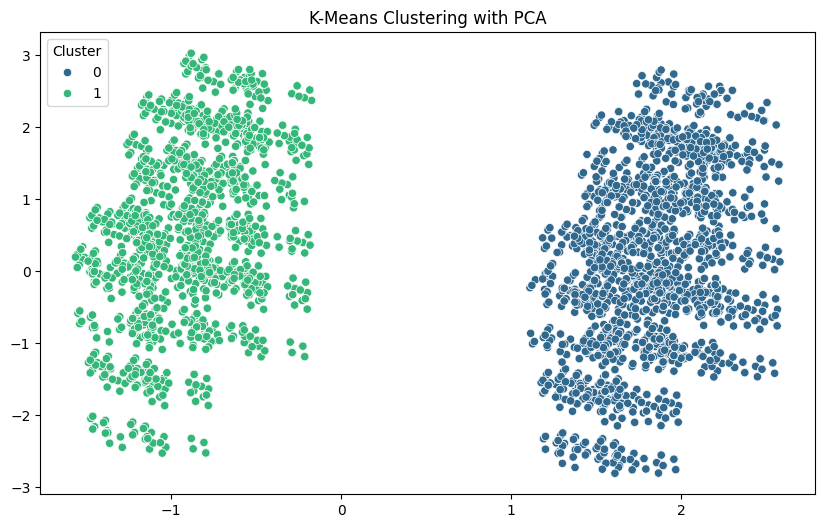

In [ ]:
import  seaborn as sns
features = ['Cholesterol','BMI','Triglycerides','Exercise Hours Per Week','Stress Level','Alcohol Consumption','Heart Rate','Heart Attack Risk']
columns = data2[features]
# Standardize the data
encod=pd.get_dummies(columns)
scaler = StandardScaler()
normalized = scaler.fit_transform(encod)
pca = PCA(n_components=2)
reduced_dim = pca.fit_transform(normalized)
# normalized = scaler.fit_transform(encod)
num_cluster = 2
kmeans = KMeans(n_clusters=num_cluster,random_state=40)
x=kmeans.fit(reduced_dim)
cluster_labels = x.labels_
cluster_centers=kmeans.cluster_centers_
data2['Cluster'] = cluster_labels


#visualizing
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_dim[:, 0], y=reduced_dim[:, 1], hue='Cluster', data=data2, palette='viridis')
plt.title('K-Means Clustering with PCA')
plt.show()



In [ ]:
import  seaborn as sns
features = ['Cholesterol','BMI','Triglycerides','Exercise Hours Per Week','Stress Level','Alcohol Consumption','Heart Rate','Heart Attack Risk']
columns = data2[features]
# Standardize the data
encod=pd.get_dummies(columns)
scaler = StandardScaler()
normalized = scaler.fit_transform(encod)
pca = PCA(n_components=2)
reduced_dim = pca.fit_transform(normalized)
# normalized = scaler.fit_transform(encod)
num_cluster = 2
kmeans = KMeans(n_clusters=num_cluster,random_state=40)
x=kmeans.fit(reduced_dim)
cluster_labels = x.labels_
cluster_centers=kmeans.cluster_centers_
data2['Cluster'] = cluster_labels
# sil_avg=silhouette_score(reduced_dim,cluster_labels)
print(f"Silhouette Score: {silhouette_score(reduced_dim, cluster_labels)}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.5102876418756477


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


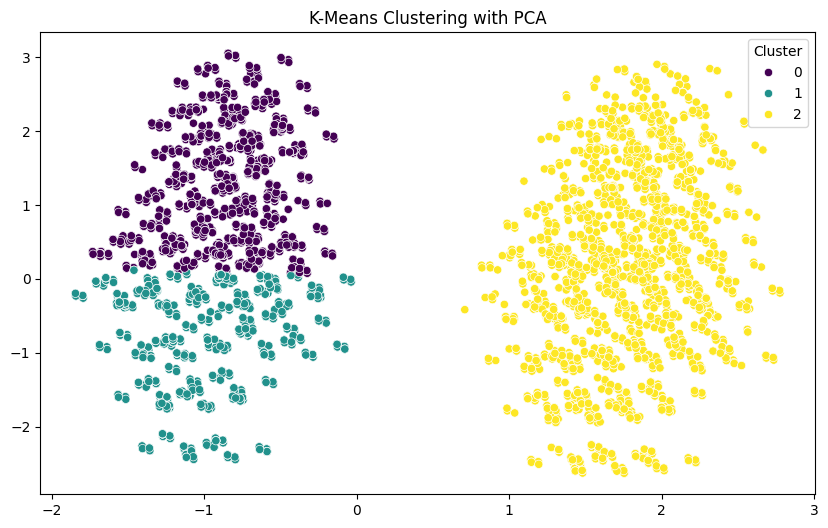

Silhouette Score: 0.4762865613127834


In [ ]:
import  seaborn as sns
features = ['Cholesterol','BMI','Triglycerides','Exercise Hours Per Week','Stress Level','Alcohol Consumption','Heart Rate','Heart Attack Risk']
columns = data2[features]
# Standardize the data
encod=pd.get_dummies(columns)
scaler = StandardScaler()
normalized = scaler.fit_transform(encod)
pca = PCA(n_components=2)
reduced_dim = pca.fit_transform(normalized)
# normalized = scaler.fit_transform(encod)
num_cluster = 3
kmeans = KMeans(n_clusters=num_cluster,random_state=40)
x=kmeans.fit(reduced_dim)
cluster_labels = x.labels_
cluster_centers=kmeans.cluster_centers_
data2['Cluster'] = cluster_labels


#visualizing
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_dim[:, 0], y=reduced_dim[:, 1], hue='Cluster', data=data2, palette='viridis')
plt.title('K-Means Clustering with PCA')
plt.show()
print(f"Silhouette Score: {silhouette_score(reduced_dim, cluster_labels)}")



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


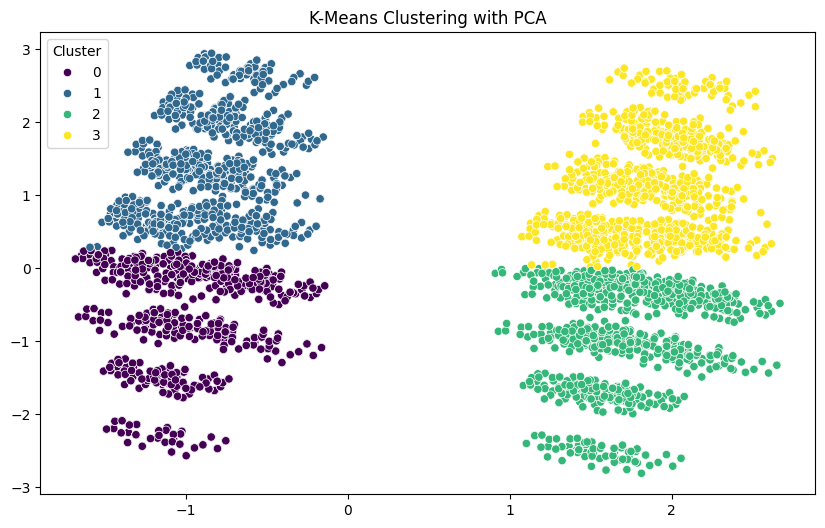

Silhouette Score: 0.5220863901997475


In [ ]:
import  seaborn as sns
features = ['Cholesterol','BMI','Triglycerides','Exercise Hours Per Week','Stress Level','Alcohol Consumption','Heart Rate','Heart Attack Risk']
columns = data2[features]
# Standardize the data
encod=pd.get_dummies(columns)
scaler = StandardScaler()
normalized = scaler.fit_transform(encod)
pca = PCA(n_components=2)
reduced_dim = pca.fit_transform(normalized)
# normalized = scaler.fit_transform(encod)
num_cluster = 4
kmeans = KMeans(n_clusters=num_cluster,random_state=40)
x=kmeans.fit(reduced_dim)
cluster_labels = x.labels_
cluster_centers=kmeans.cluster_centers_
data2['Cluster'] = cluster_labels


#visualizing
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_dim[:, 0], y=reduced_dim[:, 1], hue='Cluster', data=data2, palette='viridis')
plt.title('K-Means Clustering with PCA')
plt.show()
print(f"Silhouette Score: {silhouette_score(reduced_dim, cluster_labels)}")



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


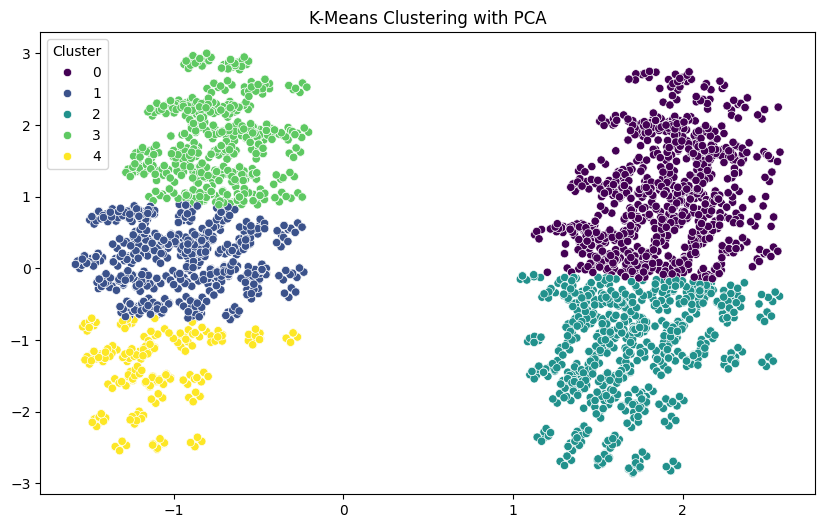

Silhouette Score: 0.4909245566463467


In [ ]:
import  seaborn as sns
features = ['Cholesterol','BMI','Triglycerides','Exercise Hours Per Week','Stress Level','Alcohol Consumption','Heart Rate','Heart Attack Risk']
columns = data2[features]
# Standardize the data
encod=pd.get_dummies(columns)
scaler = StandardScaler()
normalized = scaler.fit_transform(encod)
pca = PCA(n_components=2)
reduced_dim = pca.fit_transform(normalized)
# normalized = scaler.fit_transform(encod)
num_cluster = 5
kmeans = KMeans(n_clusters=num_cluster,random_state=40)
x=kmeans.fit(reduced_dim)
cluster_labels = x.labels_
cluster_centers=kmeans.cluster_centers_
data2['Cluster'] = cluster_labels


#visualizing
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_dim[:, 0], y=reduced_dim[:, 1], hue='Cluster', data=data2, palette='viridis')
plt.title('K-Means Clustering with PCA')
plt.show()
print(f"Silhouette Score: {silhouette_score(reduced_dim, cluster_labels)}")




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


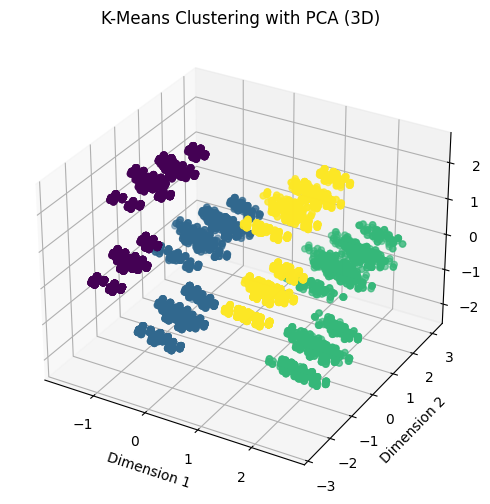

In [ ]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
features = ['Cholesterol','BMI','Triglycerides','Exercise Hours Per Week','Stress Level','Alcohol Consumption','Heart Rate','Heart Attack Risk']
columns = data2[features]
encod = pd.get_dummies(columns)
scaler = StandardScaler()
normalized = scaler.fit_transform(encod)
pca = PCA(n_components=3)
reduced_dim = pca.fit_transform(normalized)
num_cluster = 4
kmeans = KMeans(n_clusters=num_cluster, random_state=40)
x = kmeans.fit(reduced_dim)
cluster_labels = x.labels_
cluster_centers = kmeans.cluster_centers_
data2['Cluster'] = cluster_labels
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_dim[:, 0], reduced_dim[:, 1], reduced_dim[:, 2], c=cluster_labels, cmap='viridis')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.title('K-Means Clustering with PCA (3D)')
plt.show()

In [ ]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
features = ['Cholesterol','BMI','Triglycerides','Exercise Hours Per Week','Stress Level','Alcohol Consumption','Heart Rate','Heart Attack Risk']
columns = data2[features]
encod = pd.get_dummies(columns)
scaler = StandardScaler()
normalized = scaler.fit_transform(encod)
pca = PCA(n_components=3)
reduced_dim = pca.fit_transform(normalized)
num_cluster = 4
kmeans = KMeans(n_clusters=num_cluster, random_state=40)
x = kmeans.fit(reduced_dim)
cluster_labels = x.labels_
cluster_centers = kmeans.cluster_centers_
print(f"Silhouette Score: {silhouette_score(encod, cluster_labels)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.08851941844783201


In [ ]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
features = ['Cholesterol','BMI','Triglycerides','Exercise Hours Per Week','Stress Level','Alcohol Consumption','Heart Rate','Heart Attack Risk']
columns = data2[features]
encod = pd.get_dummies(columns)
scaler = StandardScaler()
normalized = scaler.fit_transform(encod)
pca = PCA(n_components=3)
reduced_dim = pca.fit_transform(normalized)
num_cluster = 5
kmeans = KMeans(n_clusters=num_cluster, random_state=40)
x = kmeans.fit(reduced_dim)
cluster_labels = x.labels_
cluster_centers = kmeans.cluster_centers_
print(f"Silhouette Score: {silhouette_score(encod, cluster_labels)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.07516063477668608


In [ ]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
features = ['Cholesterol','BMI','Triglycerides','Exercise Hours Per Week','Stress Level','Alcohol Consumption','Heart Rate','Heart Attack Risk']
columns = data2[features]
encod = pd.get_dummies(columns)
scaler = StandardScaler()
normalized = scaler.fit_transform(encod)
pca = PCA(n_components=3)
reduced_dim = pca.fit_transform(normalized)
num_cluster = 6
kmeans = KMeans(n_clusters=num_cluster, random_state=40)
x = kmeans.fit(reduced_dim)
cluster_labels = x.labels_
cluster_centers = kmeans.cluster_centers_
print(f"Silhouette Score: {silhouette_score(encod, cluster_labels)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.07096768877077064


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

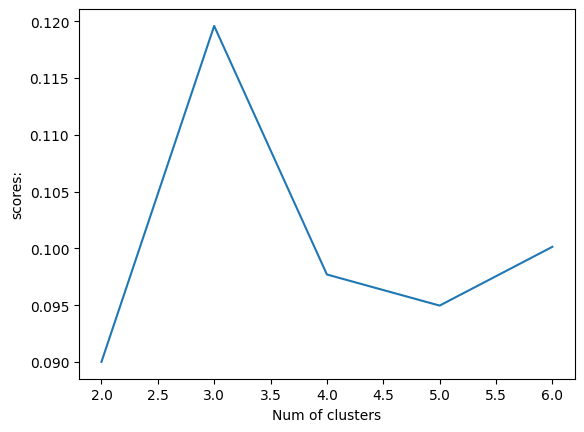

In [ ]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
features = ['Cholesterol','BMI','Triglycerides','Exercise Hours Per Week','Stress Level','Alcohol Consumption','Heart Rate','Heart Attack Risk']
columns = data2[features]
encod = pd.get_dummies(columns)
scaler = StandardScaler()
normalized = scaler.fit_transform(encod)
pca = PCA(n_components=3)
reduced_dim = pca.fit_transform(normalized)
cluster_size=range(2,7)
scores=[]
for n_clusters in cluster_size:
  kmeans=KMeans(n_clusters=n_clusters,random_state=42)
  cluster_labels=kmeans.fit_predict(encod)

  avg=silhouette_score(encod, cluster_labels)
  scores.append(avg)


plt.plot(list(cluster_size),scores)
plt.xlabel('Num of clusters')
plt.ylabel('scores:')
plt.show()

Mean shift

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


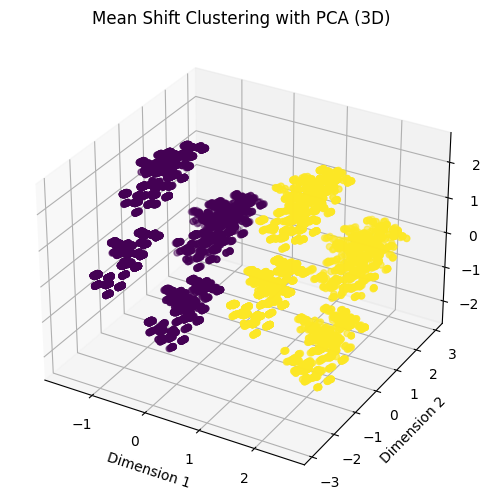

Number of Clusters: 2


In [ ]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
features = ['Cholesterol','BMI','Triglycerides','Exercise Hours Per Week','Stress Level','Alcohol Consumption','Heart Rate','Heart Attack Risk']
columns = data2[features]
encod = pd.get_dummies(columns)
scaler = StandardScaler()
normalized = scaler.fit_transform(encod)
pca = PCA(n_components=3)
reduced_dim = pca.fit_transform(normalized)
ms = MeanShift()
cluster_labels = ms.fit_predict(reduced_dim)
num_clusters = len(set(cluster_labels))
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_dim[:, 0], reduced_dim[:, 1], reduced_dim[:, 2], c=cluster_labels, cmap='viridis')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.title('Mean Shift Clustering with PCA (3D)')
plt.show()
print("Number of Clusters:", num_clusters)

2D

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


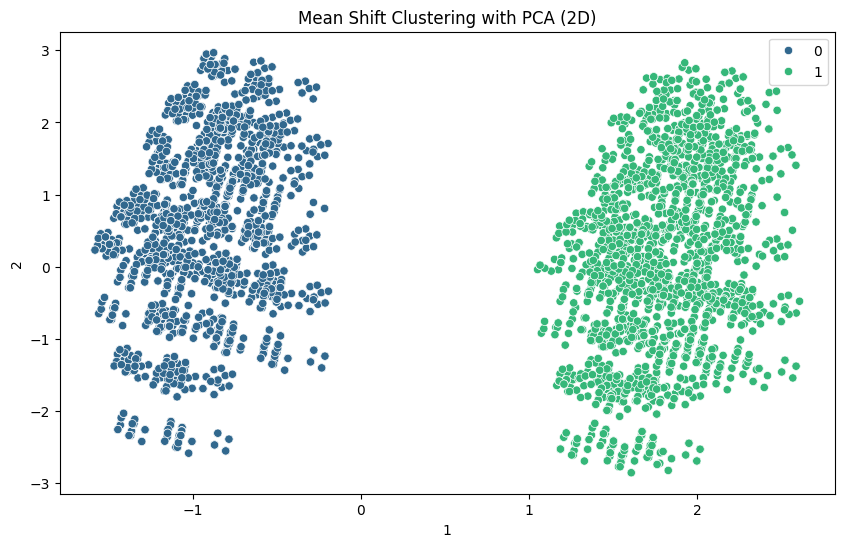

Number of Clusters: 2


In [ ]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
features = ['Cholesterol','BMI','Triglycerides','Exercise Hours Per Week','Stress Level','Alcohol Consumption','Heart Rate','Heart Attack Risk']
columns = data2[features]
encod = pd.get_dummies(columns)
scaler = StandardScaler()
normalized = scaler.fit_transform(encod)
pca = PCA(n_components=2)
reduced_dim = pca.fit_transform(normalized)
ms = MeanShift()
cluster_labels = ms.fit_predict(reduced_dim)
num_clusters = len(set(cluster_labels))
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_dim[:, 0],y=reduced_dim[:, 1],hue=cluster_labels,palette='viridis')
# ax.set_zlabel('Dimension 3')
plt.xlabel('1')
plt.ylabel('2')
plt.title('Mean Shift Clustering with PCA (2D)')
plt.show()
print("Number of Clusters:", num_clusters)

# **Classification**

##1. Identify and compare attributes

To identify and compare attributes that have a significant impact on the heart attack rate, we can perform feature importance analysis. Different machine learning algorithms provide a feature importance score that indicates the contribution of each feature in predicting the target variable.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


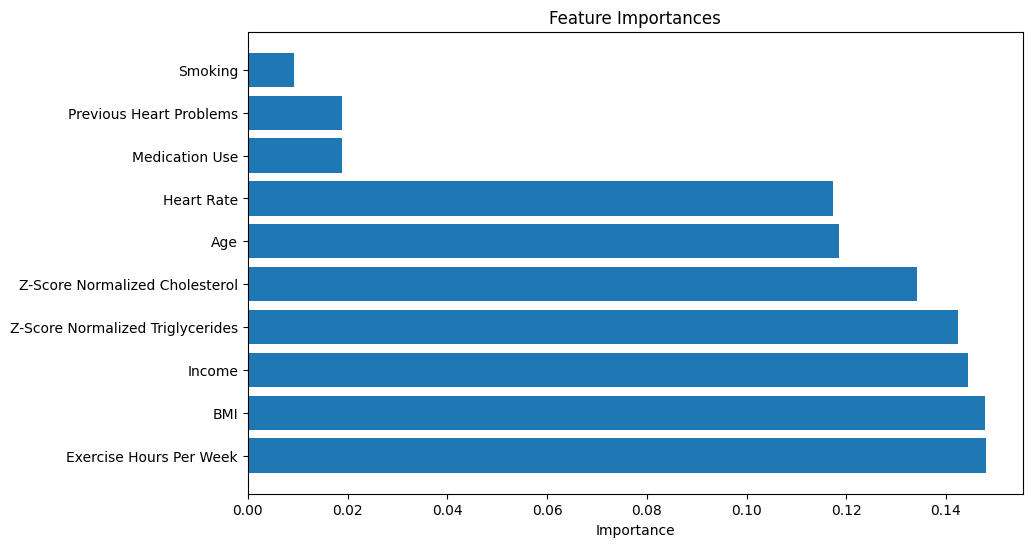

                            Feature  Importance
3           Exercise Hours Per Week    0.148011
7                               BMI    0.147871
6                            Income    0.144454
9  Z-Score Normalized Triglycerides    0.142384
8    Z-Score Normalized Cholesterol    0.134213
0                               Age    0.118619
1                        Heart Rate    0.117318
5                    Medication Use    0.018919
4           Previous Heart Problems    0.018913
2                           Smoking    0.009299


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth,association_rules
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('/content/final_result.csv')

# Assume 'Heart Attack Risk' is the target variable
X = df.drop('Heart Attack Risk', axis=1)  # Features
y = df['Heart Attack Risk']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a classification model (Random Forest in this example)
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

# Display the sorted feature importances
print(feature_importance_df)


# 2. Compare Models
Here is the code that calculates how we can compare Decision Tree, Random Forest, Logistic Regression, and Support Vector Machine (SVM) classifiers using cross-validation



*   Each classifier is evaluated using cross-validation (cross_val_score) to get an estimate of its performance on different subsets of the training data.
*   The mean accuracy and standard deviation of the accuracy across folds are printed for each classifier.
*   The classifier with the highest mean accuracy is chosen as the best classifier.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Decision Tree: Mean Accuracy: 0.5405, Standard Deviation: 0.0121
Random Forest: Mean Accuracy: 0.6208, Standard Deviation: 0.0058
Logistic Regression: Mean Accuracy: 0.6418, Standard Deviation: 0.0003
Support Vector Machine (SVM): Mean Accuracy: 0.6418, Standard Deviation: 0.0003

Best classifier is Logistic Regression


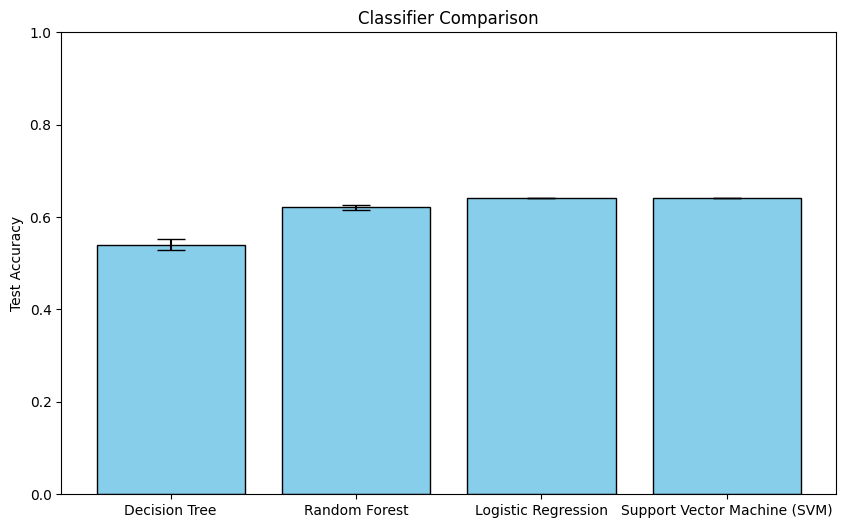

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# Assume 'Heart Attack Risk' is the target variable
X = df.drop('Heart Attack Risk', axis=1)  # Features
y = df['Heart Attack Risk']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine (SVM)': SVC(random_state=42)
}


# Evaluate each classifier using cross-validation
accuracies = []
std_devs = []

# Evaluate each classifier using cross-validation
for name, classifier in classifiers.items():
    scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
    accuracies.append(scores.mean())
    std_devs.append(scores.std())
    print(f'{name}: Mean Accuracy: {scores.mean():.4f}, Standard Deviation: {scores.std():.4f}')

# Choose the best classifier based on the cross-validated performance
best_classifier_name = max(classifiers, key=lambda k: cross_val_score(classifiers[k], X_train, y_train, cv=5, scoring='accuracy').mean())
best_classifier = classifiers[best_classifier_name]

print(f'\nBest classifier is {best_classifier_name}')

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), accuracies, yerr=std_devs, capsize=10, color='skyblue', edgecolor='black')
plt.title('Classifier Comparison')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to match the accuracy scale (0 to 1)
plt.show()

# 3. Choose the best classifier and train the dataset with it

The best classifier is then trained on the entire training set, and its performance is evaluated on the test set.

In [ ]:
# Train the best classifier on the entire training set
best_classifier.fit(X_train, y_train)

# Evaluate the best classifier on the test set
test_accuracy = best_classifier.score(X_test, y_test)
print(f'Test accuracy on whole dataset: {test_accuracy:.4f}')

Test accuracy on whole dataset: 0.6418


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#4. Performance evaluation
To evaluate the performance of a classification model using standard metrics like precision, accuracy, recall, and F1 score, we can use the precision_score, accuracy_score, recall_score, and f1_score functions from scikit-learn's metrics module.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.6378
Precision: 0.4660
Recall: 0.0764
F1 Score: 0.1313
Confusion Matrix:
[[1070   55]
 [ 580   48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.95      0.77      1125
           1       0.47      0.08      0.13       628

    accuracy                           0.64      1753
   macro avg       0.56      0.51      0.45      1753
weighted avg       0.58      0.64      0.54      1753



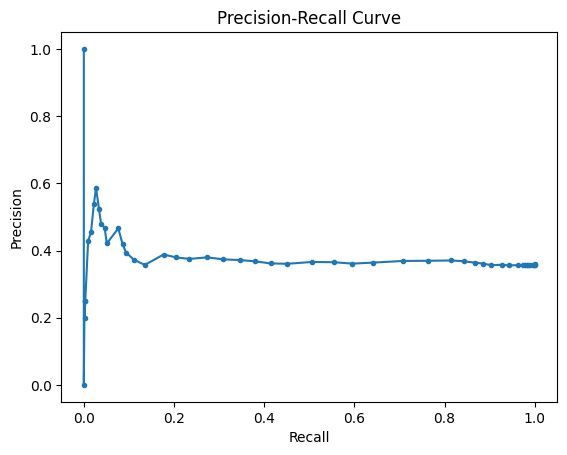

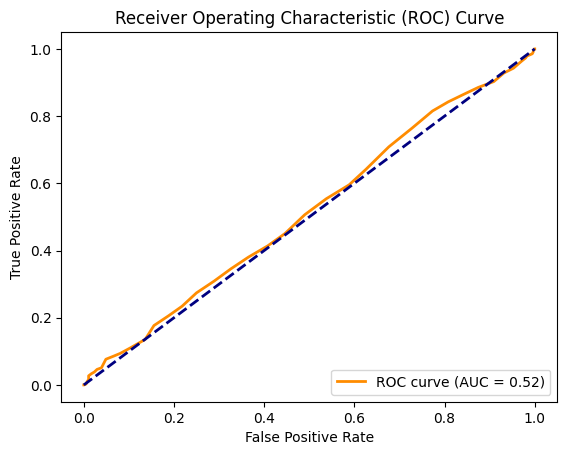

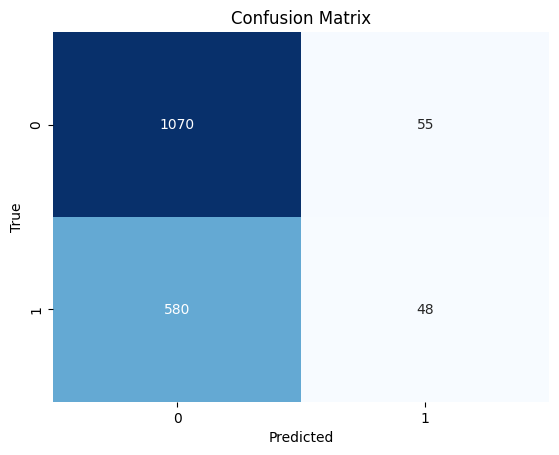

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc

# Assume 'Heart Attack Risk' is the target variable
X = df.drop('Heart Attack Risk', axis=1)  # Features
y = df['Heart Attack Risk']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose the best classifier (already trained in the previous step)
best_classifier = RandomForestClassifier(random_state=42)
best_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = best_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'\nClassification Report:\n{class_report}')


# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, best_classifier.predict_proba(X_test)[:, 1])

plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()